# Overview
In this assignment, we solve the Laplace equation:  
$$\nabla^2\phi=0$$ 
which is a special case of the Poisson's equation:  
$$\nabla^2\phi=-\rho/\epsilon$$
for a metal place whose one side is grounded and a wire at 1V goes through it.
We apply difference approximations and come to an approximation that the potential at a point is the average of the potential
of the four points surrounding it. We then start with solution and iteratively arrive at the exact solution. We converge to the
solution very slowly. We analyze the rate at which the error decays. After finding the potential distribution, we find the current distribution in the plate using the equation:  
$$\vec{J} = \sigma\vec{E}$$ which gives us:
$$j_x = - \partial \phi / \partial x$$
$$j_y = - \partial \phi / \partial y$$
to which we again apply the difference approximation and obtain the approximate current distribution.

# Code and Generated Outputs:
Importing required libraries.

In [1]:
# %matplotlib qt
from pylab import *
import mpl_toolkits.mplot3d.axes3d as p3

Initializing the size of the grid, the wire radius and the number of iterations to solve the potential distribution.

In [2]:
Nx=25; # size along x
Ny=25; # size along y
radius=8; # radius of central lead
Niter=1500; # number of iterations to perform

Creating the matrix to be manipulated and assigning potential values of $1V$ to the points which are at a distance less than $radius$ from the centre using $where$ function.

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0.]
 [0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0.
  0.]
 [0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0.
  0.]
 [0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0.
  0.]
 [0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0.
  0.]
 [0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0.
  0.]
 [0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0.
  0.]
 [0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0.
  0.]
 [0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0.
  0.]
 [0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1.

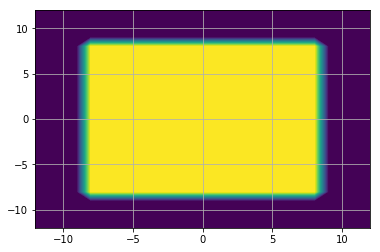

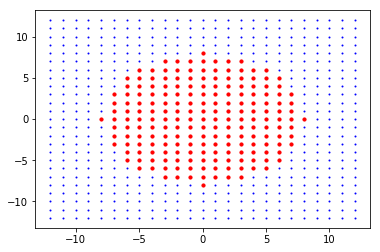

In [21]:
phi = zeros((Nx,Ny))
y = arange(-Ny//2+1,Ny//2+1,1)
x = arange(-Nx//2+1,Nx//2+1,1)
Y,X = meshgrid(y,x)
ii = where(X**2+Y**2 <= radius**2)
for x in ii[0]:
    for y in ii[1]:
        phi[x][y] = 1
print(phi)
contourf(X,Y,phi,100)
grid()
show()
scatter(X,Y, s=1, color='b')
scatter(ii[0]-Ny//2,ii[1]-Nx//2, s=10, color = 'r')
show()

Running the difference appromixation for $Niter$ times in a loop and also storing the error values in $errors$ for further analysis.

In [4]:
errors = ndarray(Niter)
for k in range(Niter):
    ophi = phi.copy()
    phi[1:-1,1:-1] = 0.25*(phi[1:-1,0:-2]+
                           phi[1:-1,2:]+
                           phi[0:-2,1:-1]+
                           phi[2:,1:-1])
    phi[1:-1,0] = phi[1:-1,1]
    phi[1:-1,-1] = phi[1:-1,-2]
    phi[0,1:-1] = phi[1,1:-1]
    phi[0,0] = phi[0,1]
    phi[0,-1] = phi[0,-2]
    phi[ii] = 1
    errors[k] = (abs(ophi-phi).max())

Now, with the stored error values for each iteration, we plot the semilogy, log-log plots and a scatter plot of the error for well spaced iterations to observe the decay of error with each iteration.

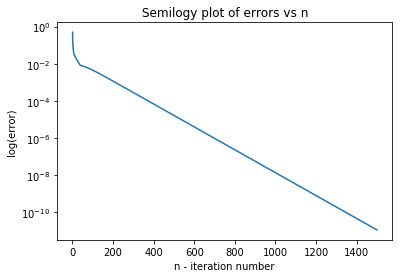

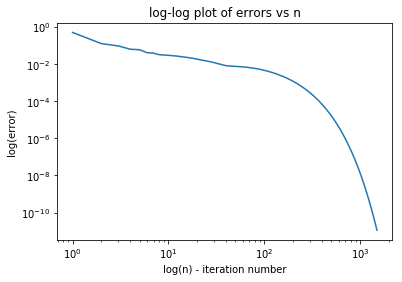

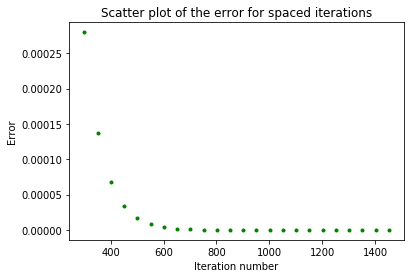

In [5]:
t = arange(1,1501,1)
title("Semilogy plot of errors vs n")
ylabel("log(error)")
xlabel("n - iteration number")
semilogy(t,errors)
show()
title("log-log plot of errors vs n")
ylabel("log(error)")
xlabel("log(n) - iteration number")
loglog(t,errors)
show()
title("Scatter plot of the error for spaced iterations")
xlabel("Iteration number")
ylabel("Error")
plot(t[300::50],errors[300::50],'go',markersize=3)
show()

We observe that the error varies exponentially after around the 500th iteration so, we approximate the error to be:  
$$error = y = Ae^{Bx}$$
where x in the iteration number and try to obtain the constants $A$ and $B$ by applying $Least Squares Approximation$ to the following linear equation :
$$log(y) = log(A) + Bx$$
We do this with only the error values after 500th iteration once and with all the error values once and plot the semilogy plot with the original error values.

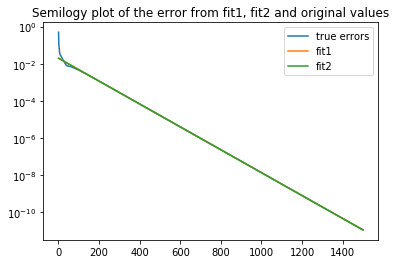

In [6]:
#fit1
M = ones((1000,2))
M[:,0] = arange(501,1501,1)
c = c_[log(errors[500:])]
b1,a1 = linalg.lstsq(M,c,rcond=None)[0]
a1 = exp(a1)
y1 = a1*(exp(b1*t))
#fit2
M = ones((1500,2))
M[:,0] = arange(1,1501,1)
c = c_[log(errors)]
b2,a2 = linalg.lstsq(M,c,rcond=None)[0]
a2 = exp(a2)
y2 = a2*(exp(b2*t))
semilogy(t,errors,t,y1,t,y2)
title("Semilogy plot of the error from fit1, fit2 and original values")
legend(['true errors','fit1','fit2'])
show()

Now, we plot the variation of potential which we calculated earlier with $x$ and $y$.

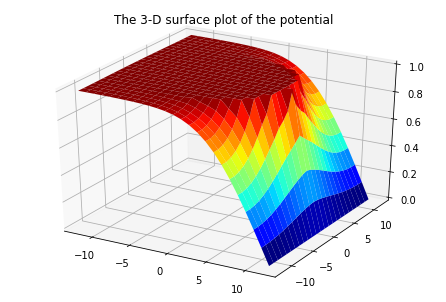

In [7]:
fig1=figure(4) # open a new figure
ax=p3.Axes3D(fig1) # Axes3D is the means to do a surface plot
title('The 3-D surface plot of the potential')
surf = ax.plot_surface(Y, X, phi.T, rstride=1, cstride=1, cmap=cm.jet,)

Now, we plot the contour plot of the same potential above.

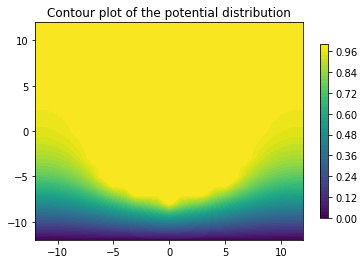

In [8]:
CS = contourf(Y,-X,phi,50)
title("Contour plot of the potential distribution")
colorbar(CS, shrink=0.8, extend='both')
show()

As we have our potential distribution ready now, we can calculate the current distribution form the equations mentioned earlier. We calculate them in $Jx$ and $Jy$ and plot them using $quiver$.

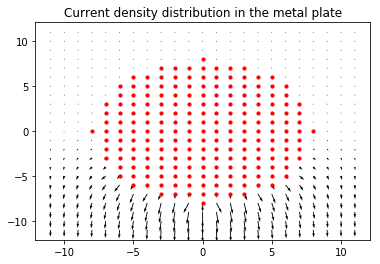

In [12]:
Jx = ndarray((Ny-2,Nx-2))
Jy = ndarray((Ny-2,Nx-2))
Jx = 0.5*(phi[1:-1,0:-2] - phi[1:-1,2:])
Jy = 0.5*(phi[0:-2,1:-1] - phi[2:,1:-1])
y = arange(-Ny//2+2,Ny//2,1)
x = arange(-Nx//2+2,Nx//2,1)
Y,X = meshgrid(y,x)
quiver(Y,X,Jx[::-1,:],-Jy[::-1,:],scale=6)
title("Current density distribution in the metal plate")
scatter(ii[0]-Ny//2,ii[1]-Nx//2, s=10, color = 'r')
show()

# Conclusion
- The averaging method for solving Laplace's Equation is a simple numerical method, but is extremely slow.
- The consective errors between the iterations were observed to decrease exponentially with each iteration.
- We could observe that most of the potential drop was there in the bottom part of the plate.
- We could also see that the current density was also concentrated in the bottom plate, so we could conclude that the heating also would take place there mostly.